In [15]:
import pandas as pd
import json

jsonl_file = "./results/output_trf_7b_newcount.jsonl"

with open(jsonl_file, "r") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)


In [16]:
df.head()

,id,question,answer,raw,res,abs_diff,order
0,0,How many ants are in the image?,7,addCriterion,NaN,-1,"[system, user, vision]"
1,1,How many gemstones are in the image?,7,addCriterion,NaN,-1,"[system, user, vision]"
2,2,How many ice cream are in the image?,7,addCriterion\n,NaN,-1,"[system, user, vision]"
3,3,How many potatoes are in the image?,7,addCriterion,NaN,-1,"[system, user, vision]"
4,4,How many bread rolls are in the image?,7,addCriterion\n��\n addCriterion\n\n addCriter...,8.0,1,"[system, user, vision]"


In [21]:
# Convert list-type orders to string
df['order_str'] = df['order'].apply(lambda x: str(x))

# Filter valid entries (abs_diff != -1)
valid_df = df[df['abs_diff'] != -1]

# Summary with avg_abs_diff, total count, and accuracy ratio
summary = valid_df.groupby('order_str').agg(
    avg_abs_diff=('abs_diff', 'mean'),
    total_count=('abs_diff', 'count'),
    accuracy_ratio=('abs_diff', lambda x: (x == 0).sum() / len(x))
)

# Ratio of missing vs valid for full group
ratio_df = df.groupby('order_str').agg(
    missing_ratio=('abs_diff', lambda x: (x == -1).sum() / len(x)),
    valid_ratio=('abs_diff', lambda x: (x != -1).sum() / len(x)),
    total_count=('abs_diff', 'count')
)

summary

,avg_abs_diff,total_count,accuracy_ratio
order_str,,,
"['system', 'user', 'vision']",3.071429,14,0.428571
"['system', 'vision', 'user']",1.953901,282,0.382979
"['user', 'system', 'vision']",1.556391,133,0.390977
"['user', 'vision', 'system']",1.871080,287,0.463415
"['vision', 'system', 'user']",2.554455,202,0.257426
"['vision', 'user', 'system']",1.681818,264,0.352273


In [22]:
ratio_df

,missing_ratio,valid_ratio,total_count
order_str,,,
"['system', 'user', 'vision']",0.954545,0.045455,308
"['system', 'vision', 'user']",0.084416,0.915584,308
"['user', 'system', 'vision']",0.568182,0.431818,308
"['user', 'vision', 'system']",0.068182,0.931818,308
"['vision', 'system', 'user']",0.344156,0.655844,308
"['vision', 'user', 'system']",0.142857,0.857143,308


In [6]:
# Convert list-type orders to string
df['order_str'] = df['order'].apply(lambda x: str(x))

# Group by the string representation and aggregate
summary = df.groupby('order_str').agg(
    total_count=('abs_diff', 'size'),
    avg_abs_diff=('abs_diff', 'mean'),
    missing_ratio=('abs_diff', lambda x: (x == -1).sum() / len(x)),
    valid_ratio=('abs_diff', lambda x: (x != -1).sum() / len(x))
)

summary

,total_count,avg_abs_diff,missing_ratio,valid_ratio
order_str,,,,
"['system', 'user', 'vision']",308,1.311688,0.272727,0.727273
"['system', 'vision', 'user']",308,2.512987,0.116883,0.883117
"['user', 'system', 'vision']",308,2.990260,0.025974,0.974026
"['user', 'vision', 'system']",308,2.444805,0.012987,0.987013
"['vision', 'system', 'user']",308,-0.564935,0.905844,0.094156
"['vision', 'user', 'system']",308,2.522727,0.107143,0.892857


In [7]:
df

,id,question,answer,raw,res,abs_diff,order,order_str
0,0,How many ants are in the image?,7,addCriterion,NaN,-1,"[system, user, vision]","['system', 'user', 'vision']"
1,1,How many gemstones are in the image?,7,"addCriterion\nThe image contains 12 red dots,...",12.0,5,"[system, user, vision]","['system', 'user', 'vision']"
2,2,How many ice cream are in the image?,7,addCriterion\nThe image contains 12 red dots ...,12.0,5,"[system, user, vision]","['system', 'user', 'vision']"
3,3,How many potatoes are in the image?,7,\n addCriterion\nThere are 12 red dots in the ...,12.0,5,"[system, user, vision]","['system', 'user', 'vision']"
4,4,How many bread rolls are in the image?,7,addCriterion\nThe image contains 12 red dots ...,12.0,5,"[system, user, vision]","['system', 'user', 'vision']"
...,...,...,...,...,...,...,...,...
1843,303,How many red circles are in the image?,12,addCriterion\nThe image contains 12 red circles.,12.0,0,"[vision, user, system]","['vision', 'user', 'system']"
1844,304,How many red circles are in the image?,12,addCriterion\nThe image contains 12 red circles.,12.0,0,"[vision, user, system]","['vision', 'user', 'system']"
1845,305,How many red circles are in the image?,12,addCriterion\nThe image contains 12 red circles.,12.0,0,"[vision, user, system]","['vision', 'user', 'system']"
1846,306,How many red circles are in the image?,12,addCriterion\nThe image contains 12 red circles.,12.0,0,"[vision, user, system]","['vision', 'user', 'system']"


In [8]:
df.res.value_counts()

res
12.0    783
10.0    514
13.0     80
0.0      21
1.0       3
8.0       2
2.0       1
Name: count, dtype: int64

In [10]:
!pip install matplotlib seaborn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 311.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 234.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 343.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


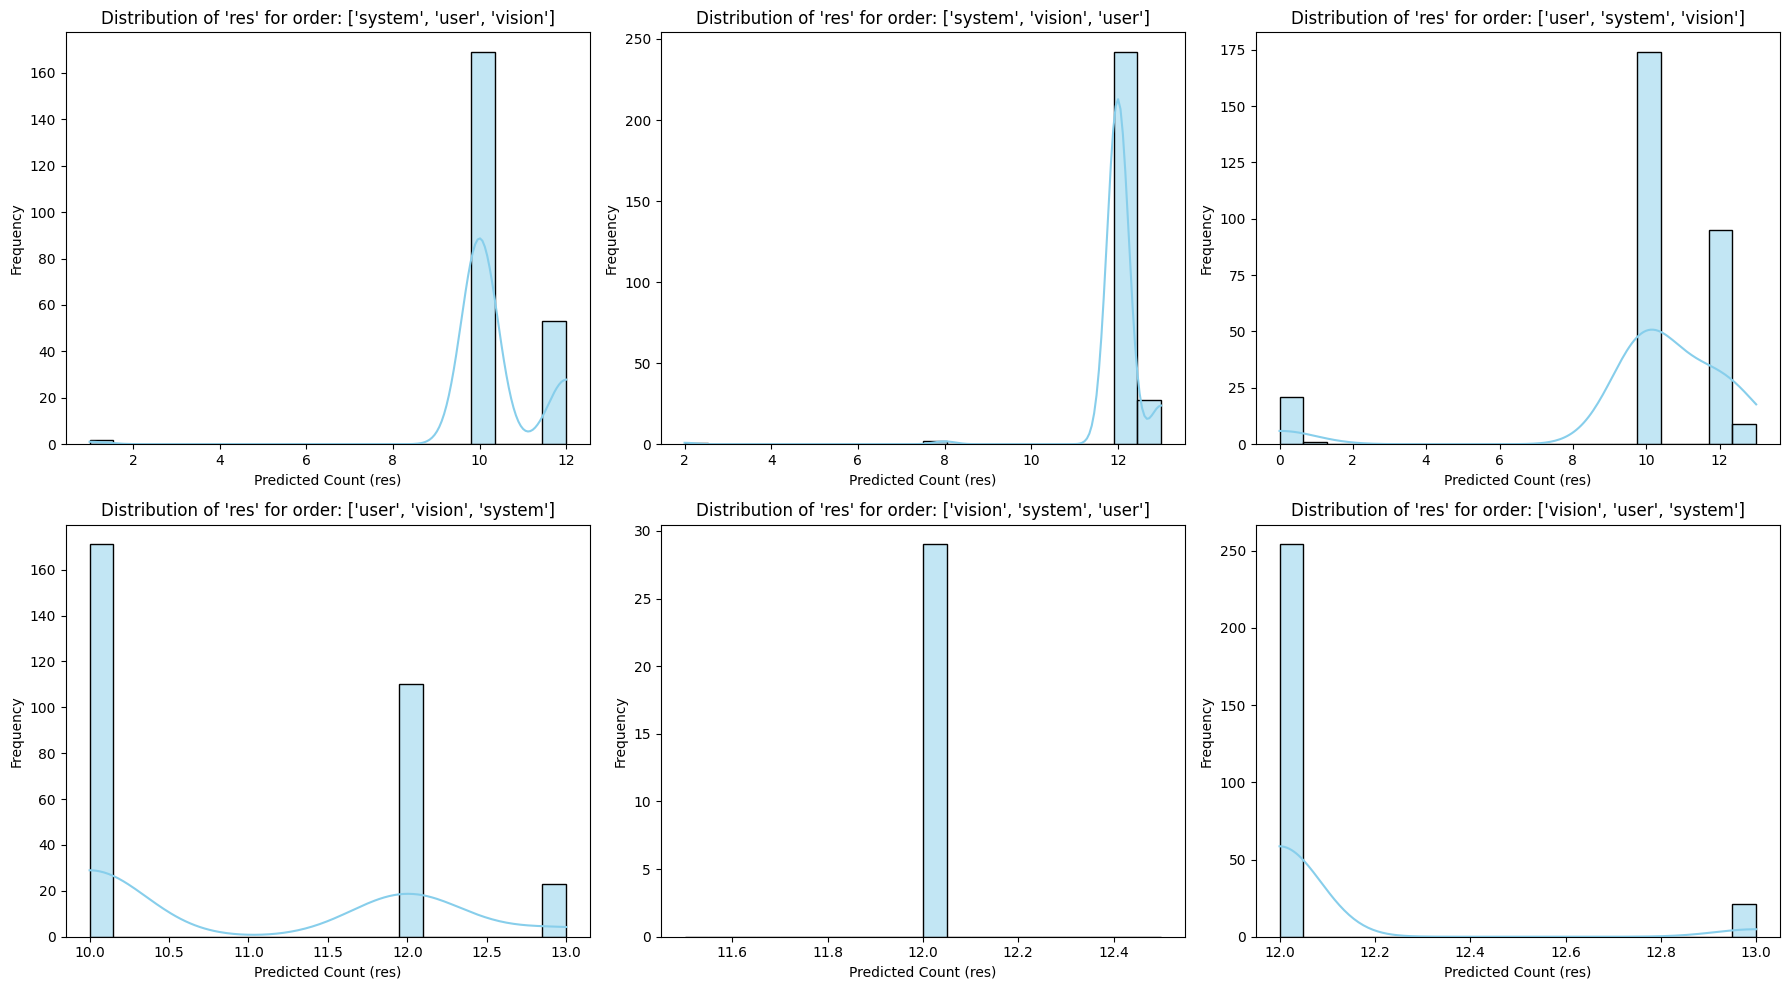

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'order' column is string
df['order_str'] = df['order'].apply(lambda x: str(x))

# Get unique orders
orders = df['order_str'].unique()
num_orders = len(orders)

# Set up subplots (e.g., 2 rows x 3 columns if 6 orders)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, order in zip(axes, orders):
    subset = df[df['order_str'] == order]
    sns.histplot(subset['res'].dropna(), bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of 'res' for order: {order}", fontsize=12)
    ax.set_xlabel("Predicted Count (res)")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()